In [1]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import nltk

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('SDP_Train_Features.csv', encoding='unicode_escape')
dg=pd.read_csv('SDP_Test_Features.csv', encoding='unicode_escape')

In [4]:
def train_test(X,y):
    trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=2)
    return trainX, testX, trainy, testy

In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
scaler = StandardScaler()
comparison_dict = {}
solvers = ['lbfgs', 'adam']
activation_functions = ['tanh']
hidden_layer_sizes = [(256,256,),(512,512,),(1024,1024,),(1024,512,),(1024,256,)]

In [6]:
comparison_dict=dict()
def NN_eval(X, y, model, count, title="Influence"):
    X = np.array([*X])
    trainX, testX, trainy, testy =train_test(X,y)
    scaler.fit(trainX)
    trainX=scaler.transform(trainX)
    scaler.fit(testX)
    testX=scaler.transform(testX)
    # fit a model
    model.fit(trainX, trainy)
    # predict probabilities
    lr_probs = model.predict_proba(testX)
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]
    # calculate scores
    lr_auc = roc_auc_score(testy, lr_probs)

    print('Neural: ROC AUC=%.3f' % (lr_auc))
    predy = model.predict(testX)
    score = f1_score(testy, predy)
    print("Influence F1 score: {}".format(score))
    fpr, tpr, thresholds = roc_curve(testy, lr_probs)
    comparison_dict[count] = {"solver": solver, "activation_function": ac,
                                      "hidden_layers": hidden_layer_config,
                              "auc_score": lr_auc,
                              "accuracy": model.score(testX, testy), "loss": model.loss_, "F1_score": score}
    # Plot the curve
    print ("Accuracy", comparison_dict[count]['accuracy'], "Loss", comparison_dict[count]["loss"])
    plt.figure(figsize = (10,6))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.plot(fpr, tpr, linestyle = "--", marker = ".",  markersize = 15)
    plt.plot([0,1],[0,1], linestyle = "--", c = "k")
    plt.show()

In [7]:
from ast import literal_eval
import ast

In [8]:
for i, r in df.iterrows():
    df.at[i, 'embedding']=tuple(map(float, df['embedding'][i][1:len(df['embedding'][i])-1].split(', ')))

In [9]:
print (df['embedding'][0])
print (type(df['embedding'][0]))

(0.09523809523809523, 0.09523809523809523, 0.0, 0.0, 0.125, 0.0, 1.0, 1.0, 0.11214953271028037, 0.0, 0.0, 0.0, 0.0, 0.35847831441517825, 0.08846726280556937, 0.4203224555479471, 0.4725489096683759, 0.23092354701105122, 0.08931623938232303, 0.5299089029813724, 0.8814665455152223, 0.7539265325277213, 0.7096591380928259, 0.17155349219741445, 0.5353004037468266, 0.8481777618758662, 0.9183843729640037, 0.17974264251778876, 0.39736247551330983, 0.5355930894219071, 0.5370944343526772, 0.9571907709892151, 0.4303276365443199, 0.5093525082235996, 0.6323800920268017, 0.041538194679535546, 0.33922556823658634, 0.6711299406708219, 0.9001211412010893, 0.6234177840075125, 0.7584491825410413, 0.5297944671359291, 0.5325363351238488, 0.10677245269763014, 0.5111534735016349, 0.7601572157205426, 0.6519043091936558, 0.3209874395032027, 0.8380822301527838, 0.197623626310303, 0.4424259200194439, 0.10843248045442468, 0.2083844431777173, 0.27649637033539254, 0.5579175701109653, 0.23588172291045154, 0.671158889

On model #1
Neural: ROC AUC=0.629
Influence F1 score: 0.5758620689655172
Accuracy 0.59 Loss 0.0007388215137952815


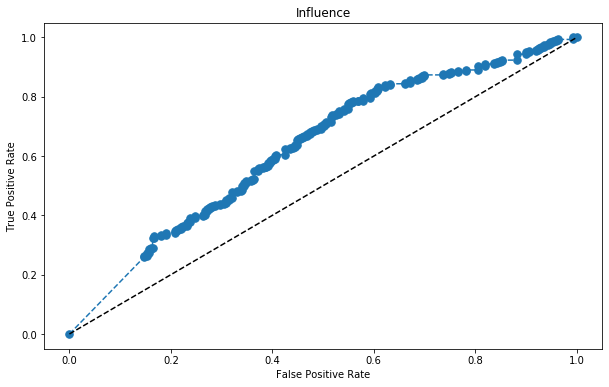

On model #2
Neural: ROC AUC=0.597
Influence F1 score: 0.5655172413793104
Accuracy 0.58 Loss 0.0006884928362703398


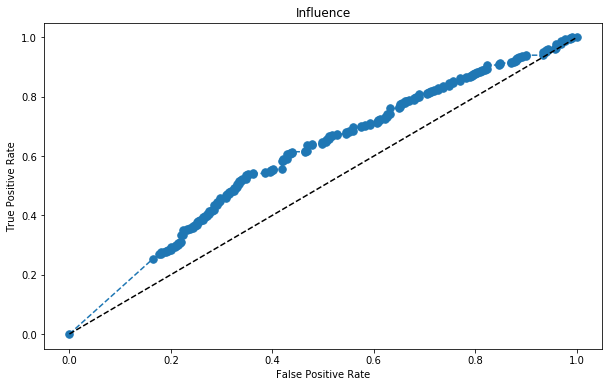

On model #3
Neural: ROC AUC=0.607
Influence F1 score: 0.5628140703517587
Accuracy 0.565 Loss 0.0007132411763129939


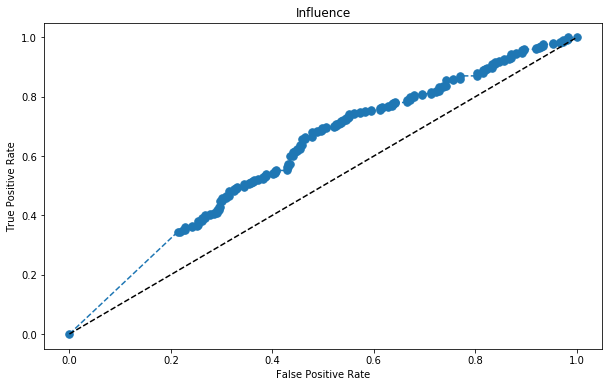

On model #4
Neural: ROC AUC=0.651
Influence F1 score: 0.5866209262435678
Accuracy 0.5983333333333334 Loss 0.0007307652313435886


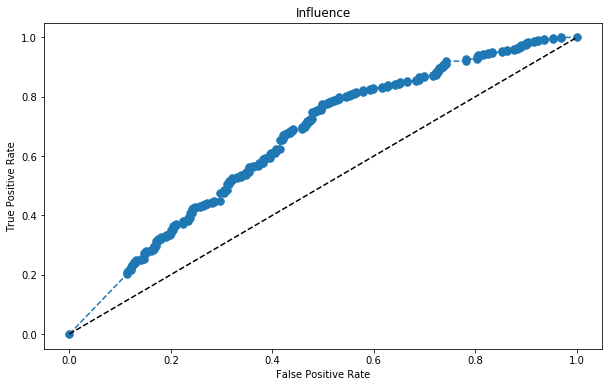

On model #5
Neural: ROC AUC=0.630
Influence F1 score: 0.6086956521739131
Accuracy 0.625 Loss 0.0008375182866965692


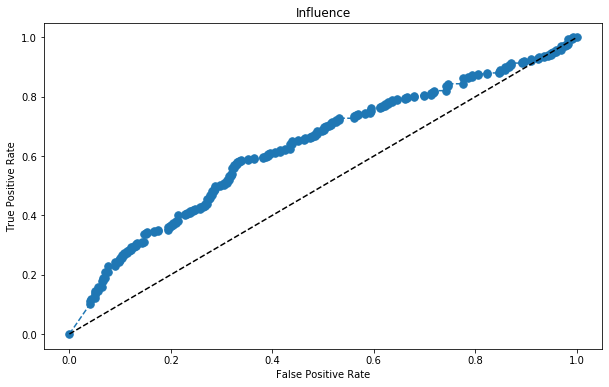

On model #6
Neural: ROC AUC=0.641
Influence F1 score: 0.5976627712854758
Accuracy 0.5983333333333334 Loss 0.041053964907668924


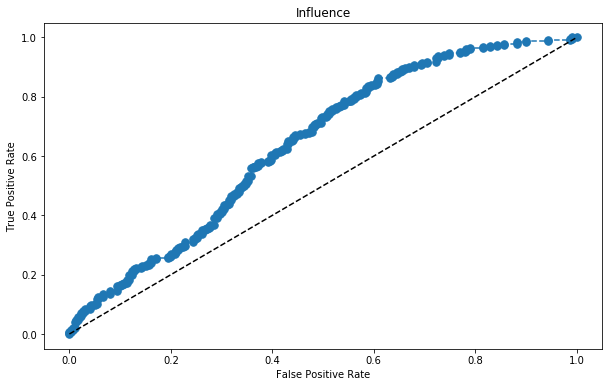

On model #7
Neural: ROC AUC=0.657
Influence F1 score: 0.6070826306913996
Accuracy 0.6116666666666667 Loss 0.019258458444506753


On model #8
Neural: ROC AUC=0.639
Influence F1 score: 0.5905096660808435
Accuracy 0.6116666666666667 Loss 0.02106053696119204


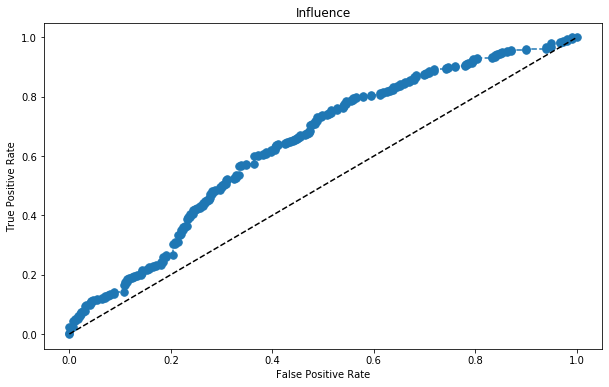

On model #9
Neural: ROC AUC=0.655
Influence F1 score: 0.6192893401015229
Accuracy 0.625 Loss 0.023567299154391923


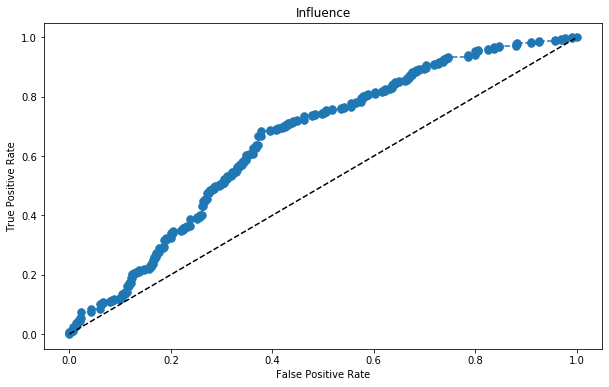

On model #10
Neural: ROC AUC=0.649
Influence F1 score: 0.5644599303135889
Accuracy 0.5833333333333334 Loss 0.020670660379191


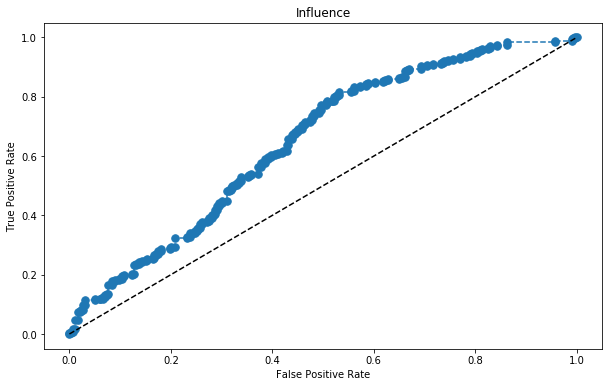

In [10]:
count = 1
for solver in solvers:
    for ac in activation_functions:
        for hidden_layer_config in hidden_layer_sizes:
            print("On model #%d" % (count))
            nclf = MLPClassifier(solver=solver, alpha=1e-5, hidden_layer_sizes=hidden_layer_config,
                                random_state=1, max_iter=15000, activation=ac)
            NN_eval(df['embedding'], df['citation_influence_label'], nclf, count)
            count += 1

In [11]:
comparison_df = pd.DataFrame(comparison_dict).T
comparison_df['accuracy'] = pd.to_numeric(comparison_df['accuracy'])
comparison_df['F1_score'] = pd.to_numeric(comparison_df['F1_score'])
comparison_df.to_excel('InfluenceComparisonDict.xlsx')

In [12]:
max_a_index = comparison_df['accuracy'].idxmax()
row = comparison_df.loc[max_a_index]
print("The best accuracy score out of %d models is for" % (count - 1))
print(row)

The best accuracy score out of 10 models is for
solver                       lbfgs
activation_function           tanh
hidden_layers          (1024, 256)
auc_score                 0.630385
accuracy                     0.625
loss                   0.000837518
F1_score                  0.608696
Name: 5, dtype: object


In [13]:
max_f1_index = comparison_df['F1_score'].idxmax()
row = comparison_df.loc[max_f1_index]
print("The best F1 score out of %d models is for" % (count - 1))
print(row)

The best F1 score out of 10 models is for
solver                        adam
activation_function           tanh
hidden_layers          (1024, 512)
auc_score                 0.654596
accuracy                     0.625
loss                     0.0235673
F1_score                  0.619289
Name: 9, dtype: object


In [14]:
comparison_dict

{1: {'solver': 'lbfgs',
  'activation_function': 'tanh',
  'hidden_layers': (256, 256),
  'auc_score': 0.6294625495838843,
  'accuracy': 0.59,
  'loss': 0.0007388215137952815,
  'F1_score': 0.5758620689655172},
 2: {'solver': 'lbfgs',
  'activation_function': 'tanh',
  'hidden_layers': (512, 512),
  'auc_score': 0.5970510783453149,
  'accuracy': 0.58,
  'loss': 0.0006884928362703398,
  'F1_score': 0.5655172413793104},
 3: {'solver': 'lbfgs',
  'activation_function': 'tanh',
  'hidden_layers': (1024, 1024),
  'auc_score': 0.6071623018033534,
  'accuracy': 0.565,
  'loss': 0.0007132411763129939,
  'F1_score': 0.5628140703517587},
 4: {'solver': 'lbfgs',
  'activation_function': 'tanh',
  'hidden_layers': (1024, 512),
  'auc_score': 0.6512961255125058,
  'accuracy': 0.5983333333333334,
  'loss': 0.0007307652313435886,
  'F1_score': 0.5866209262435678},
 5: {'solver': 'lbfgs',
  'activation_function': 'tanh',
  'hidden_layers': (1024, 256),
  'auc_score': 0.630384782053134,
  'accuracy': 0

In [15]:
for i, r in dg.iterrows():
    dg.at[i, 'embedding']=tuple(map(float, dg['embedding'][i][1:len(dg['embedding'][i])-1].split(', ')))

In [16]:
print (dg['embedding'][0])
print (type(dg['embedding'][0]))

(0.3684210526315789, 0.3684210526315789, 0.1, 0.6666666666666666, 0.16666666666666666, 0.0, 0.4788732394366197, 0.4351145038167939, 0.3979591836734694, 0.0, 0.0, 0.0, 0.0, 0.5265253983631664, 0.17440724480670683, 0.2746321450806248, 0.2736058433844711, 0.21394704530389658, 0.2718539582192776, 0.4193496619048769, 0.7190480762517654, 0.581720871818298, 0.471841910545399, 0.39032699025514145, 0.5370439251539102, 0.597038329975688, 0.5918640609889807, 0.3761589201887341, 0.3518929088722616, 0.6509655508896784, 0.4788091746195347, 0.5743855549951679, 0.7244883500628789, 0.5336361749413294, 0.5642367453419538, 0.26795186156972123, 0.4656137677950161, 0.6718951430798448, 0.612602086818868, 0.5522051034009962, 0.5809830842196688, 0.3651393458391545, 0.44252763484656366, 0.36778816654880925, 0.151374870743393, 0.6134171262779784, 0.6001708847899403, 0.389243809335838, 0.8475177482190865, 0.19435049306061808, 0.7280506943072489, 0.2700694783162548, 0.4260496660247764, 0.4299978857143954, 0.56218

In [17]:
pred_dict=dict()
def NN_predict(trainX, trainy, testX, model, count=0, title="Influence"):
    trainX = np.array([*trainX])
    testX = np.array([*testX])
    scaler.fit(trainX)
    trainX=scaler.transform(trainX)
    scaler.fit(testX)
    testX=scaler.transform(testX)
    model.fit(trainX, trainy)
    predy = model.predict(testX)
    pred_dict[count] = {"solver": solver, "activation_function": ac,
                                      "hidden_layers": hidden_layer_config,
                              "predicted": predy}

In [21]:
count = 1
for solver in solvers:
    for ac in activation_functions:
        for hidden_layer_config in hidden_layer_sizes:
            print("On model #%d" % (count))
            nclf = MLPClassifier(solver=solver, alpha=1e-5, hidden_layer_sizes=hidden_layer_config,
                                random_state=1, max_iter=15000, activation=ac)
            NN_predict(df['embedding'], df['citation_influence_label'], dg['embedding'], nclf, count)
            count += 1

On model #1
On model #2
On model #3
On model #4
On model #5
On model #6
On model #7
On model #8
On model #9
On model #10


In [22]:
pred_dict

{1: {'solver': 'lbfgs',
  'activation_function': 'tanh',
  'hidden_layers': (256, 256),
  'predicted': array([1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
         0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
         0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
         1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
         1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
         1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
         1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
         0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
         0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
         0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
         0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [31]:
rawpred=pd.DataFrame(pred_dict)
rawpred=rawpred.T
rawpred.to_excel('TenModelPred.xlsx')